# taxi time

## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

## load the data

In [2]:
df = pd.read_csv("train.csv")

## explore the data

In [3]:
df.shape

(1458644, 11)

In [4]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [6]:
import gpxpy.geo
def cal_dis(x):
    dist = gpxpy.geo.haversine_distance(x['pickup_longitude'], x['pickup_latitude'],
                                        x['dropoff_longitude'],x['dropoff_latitude'])
    return dist    

In [7]:
df['dist'] = df.apply(cal_dis, axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df['dist'] = scaler.fit_transform(df['dist'])

/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [10]:
from datetime import datetime
datestring = df['pickup_datetime'][0]
dt = datetime.strptime(datestring, '%Y-%m-%d %H:%M:%S')
print dt.year, dt.month, dt.day

2016 3 14


In [11]:
def get_year( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.year    

In [12]:
def get_month( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return str(dt.month)

In [13]:
def get_day( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.day

In [14]:
df['pickup_year'] = df['pickup_datetime'].apply(get_year)

In [15]:
np.unique(df['pickup_year'])

array([2016])

In [16]:
df['pickup_month'] = df['pickup_datetime'].apply(get_month)

In [17]:
np.unique(df.pickup_month)

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [18]:
df['pickup_day'] = df['pickup_datetime'].apply(get_day)

In [19]:
datetime.strptime(df['pickup_datetime'][100], '%Y-%m-%d %H:%M:%S').strftime('%A')

'Wednesday'

In [20]:
def get_week_day( time_string):
    week_day = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S').strftime('%A')
    return week_day

In [21]:
df['pickup_week_day'] = df['pickup_datetime'].apply(get_week_day)

In [22]:
df['pickup_day'].head(5)

0    14
1    12
2    19
3     6
4    26
Name: pickup_day, dtype: int64

In [141]:
def get_hour( time_string):
    time = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return str(time.hour)

In [142]:
df['pickup_hour'] = df['pickup_datetime'].apply(get_hour)

In [143]:
df_small = df[['vendor_id','passenger_count','trip_duration']]

In [144]:
np.unique(df_small.vendor_id)

array([1, 2])

In [145]:
np.unique(df_small.passenger_count)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

{'boxes': [<matplotlib.lines.Line2D at 0x7f583dfebed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f584cc01d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f584cc1b050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f584cc0d9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f584cbf2fd0>,
  <matplotlib.lines.Line2D at 0x7f584cc016d0>]}

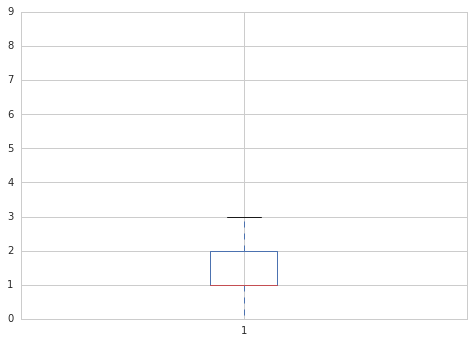

In [146]:
plt.boxplot(df_small['passenger_count'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f581a447150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f584cbd8e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5849c4b1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5849c40b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f584cbd8190>,
  <matplotlib.lines.Line2D at 0x7f584cbd8850>]}

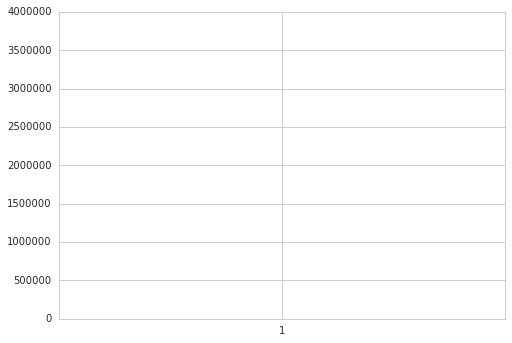

In [147]:
plt.boxplot(df_small['trip_duration'])


(array([  1.45658900e+06,   7.00000000e+01,   5.00000000e+01,
          1.93100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

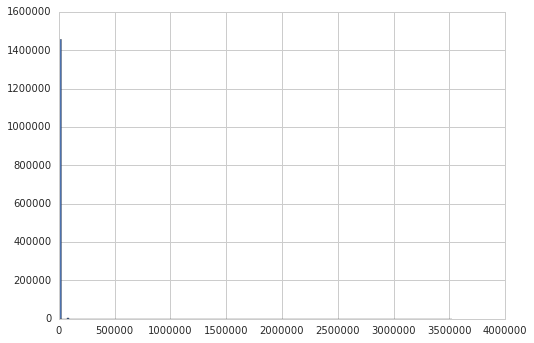

In [148]:
plt.hist(df_small['trip_duration'], bins =150)

In [149]:
df_small['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [150]:
trip_duration_q2=np.percentile(df_small.trip_duration.values,2)

In [151]:
trip_duration_q98=np.percentile(df_small.trip_duration.values,98)

In [152]:
df_small_wo_outlier = df_small [ np.logical_and (df_small.trip_duration >trip_duration_q2 
          , df_small.trip_duration <trip_duration_q98)]

(array([ 11382.,  13370.,  16056.,  17768.,  19593.,  21454.,  22391.,
         24362.,  24697.,  25755.,  25772.,  26745.,  26681.,  27271.,
         26818.,  26806.,  27118.,  26541.,  26568.,  26037.,  25909.,
         25269.,  24972.,  24646.,  24210.,  23620.,  23155.,  22657.,
         22037.,  21524.,  22301.,  20564.,  20058.,  19620.,  18860.,
         18596.,  17850.,  17431.,  17103.,  16474.,  16301.,  15565.,
         15473.,  14804.,  14213.,  13931.,  13486.,  13225.,  12777.,
         12090.,  11886.,  11555.,  11205.,  10598.,  10452.,  10183.,
          9857.,   9824.,   9244.,   9025.,   9164.,   8523.,   8018.,
          7931.,   7651.,   7347.,   7040.,   6888.,   6822.,   6395.,
          6413.,   6151.,   5902.,   5693.,   5574.,   5497.,   5203.,
          5126.,   4941.,   4795.,   4569.,   4393.,   4305.,   4080.,
          4072.,   3710.,   3709.,   3650.,   3593.,   3670.,   3287.,
          3180.,   3109.,   2960.,   2925.,   2880.,   2795.,   2666.,
      

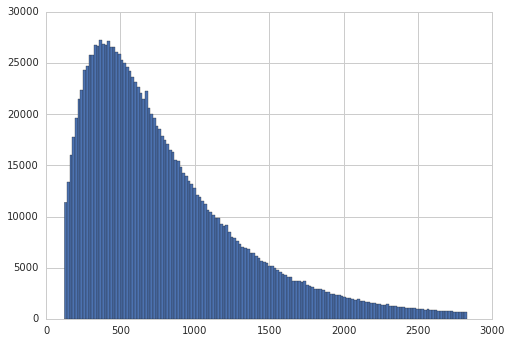

In [153]:
plt.hist(df_small_wo_outlier['trip_duration'], bins =150)

(array([  1659.,   1647.,   1142.,   1818.,   2007.,   1824.,   1976.,
          2065.,   2131.,   2247.,   2244.,   3195.,   2449.,   2530.,
          3531.,   2763.,   3625.,   3761.,   2974.,   4015.,   3862.,
          4034.,   4216.,   5475.,   4350.,   4291.,   5820.,   4743.,
          5989.,   6054.,   6050.,   6146.,   6283.,   6389.,   6643.,
          8227.,   6806.,   8023.,   6980.,   8300.,   8516.,   8516.,
         10058.,   8629.,   9937.,   8660.,  10517.,  10288.,  10129.,
         10494.,  11998.,  10620.,  12182.,  12032.,  11889.,  11800.,
         11947.,  13401.,  13705.,  13354.,  13323.,  13397.,  13201.,
         14670.,  14513.,  14471.,  14282.,  15598.,  15289.,  15409.,
         15241.,  14906.,  16301.,  15959.,  15819.,  16722.,  15348.,
         16218.,  17197.,  15597.,  16755.,  16313.,  17057.,  15912.,
         16410.,  17267.,  15681.,  16354.,  16867.,  15526.,  16126.,
         16620.,  16252.,  15862.,  15351.,  15801.,  15826.,  14691.,
      

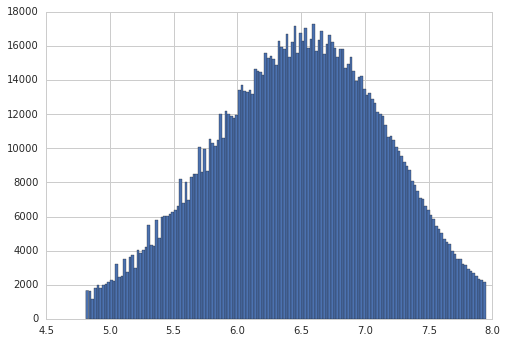

In [154]:
plt.hist(np.log(df_small_wo_outlier['trip_duration'].values), bins =150)

In [155]:
np.unique(df.store_and_fwd_flag)

array(['N', 'Y'], dtype=object)

In [156]:
df[df['store_and_fwd_flag']=="Y"].trip_duration.describe()

count    8045.000000
mean     1080.763331
std       925.645317
min         2.000000
25%       455.000000
50%       812.000000
75%      1400.000000
max      9984.000000
Name: trip_duration, dtype: float64

(array([  4.82600000e+03,   2.13500000e+03,   6.95000000e+02,
          2.51000000e+02,   9.20000000e+01,   3.30000000e+01,
          1.00000000e+01,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.00000000e+00,   1.00020000e+03,   1.99840000e+03,
          2.99660000e+03,   3.99480000e+03,   4.99300000e+03,
          5.99120000e+03,   6.98940000e+03,   7.98760000e+03,
          8.98580000e+03,   9.98400000e+03]),
 <a list of 10 Patch objects>)

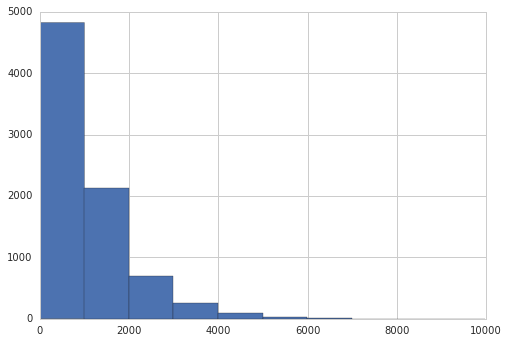

In [157]:
plt.hist(df[df['store_and_fwd_flag']=="Y"].trip_duration)

In [158]:
df[df['store_and_fwd_flag']=="N"].trip_duration.describe()

count    1.450599e+06
mean     9.588197e+02
std      5.251475e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.074000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [159]:
df.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'dist', u'pickup_year', u'pickup_month',
       u'pickup_day', u'pickup_week_day', u'pickup_hour'],
      dtype='object')

In [160]:
df_selected = df[ np.logical_and (df_small.trip_duration >trip_duration_q2 
          , df_small.trip_duration <trip_duration_q98)]

In [161]:
df_selected = df_selected[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_day', 'pickup_hour',
                  'pickup_week_day','trip_duration','dist']]

In [162]:
feature = df_selected[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_hour',
                  'pickup_week_day','dist']]

In [163]:
df_selected_200 = df_selected[:200]

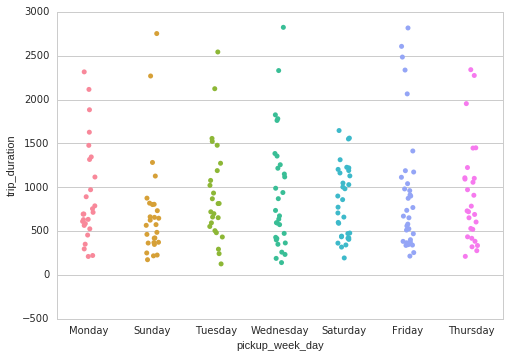

In [164]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="pickup_week_day", y="trip_duration", data=df_selected_200, jitter=True)

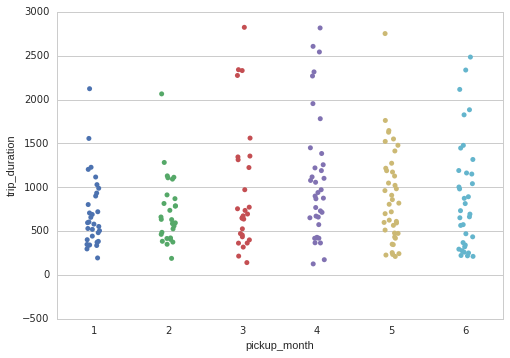

In [165]:
sns.stripplot(x="pickup_month", y="trip_duration", data=df_selected_200,  jitter=True)

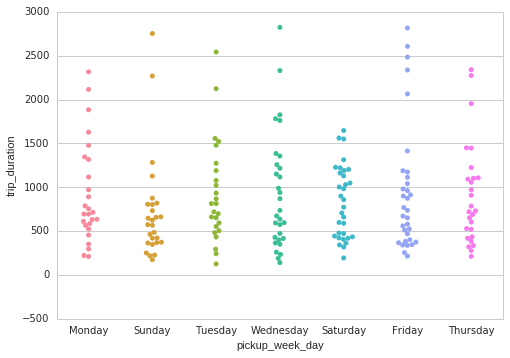

In [166]:
sns.swarmplot(x="pickup_week_day", y="trip_duration", data=df_selected_200)

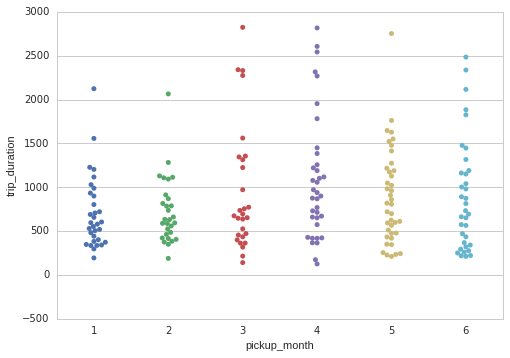

In [167]:
sns.swarmplot(x="pickup_month", y="trip_duration", data=df_selected_200)

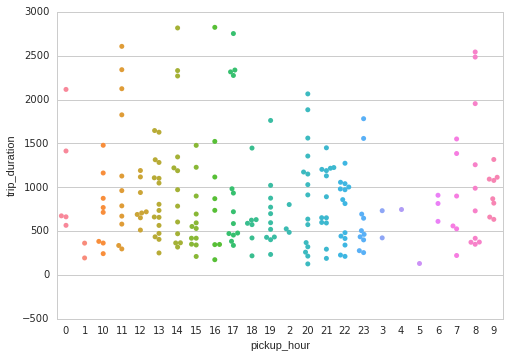

In [168]:
sns.swarmplot(x="pickup_hour", y="trip_duration", data=df_selected_200)

In [169]:
X= pd.get_dummies(feature)

In [170]:
X.head(5)

,vendor_id,passenger_count,dist,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,...,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_week_day_Friday,pickup_week_day_Monday,pickup_week_day_Saturday,pickup_week_day_Sunday,pickup_week_day_Thursday,pickup_week_day_Tuesday,pickup_week_day_Wednesday
0,2,1,0.002289,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0.002503,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0.003943,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1,0.000558,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,0.000386,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [171]:
X.shape

(1400060, 42)

In [172]:
y = df_selected.trip_duration

In [192]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print X_train.shape
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

(1120048, 42)
Training set has 1120048 samples.
Testing set has 280012 samples.


In [174]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)    
    
    # Return the score
    return score

In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)
    

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 
    #'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.   
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [176]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 10 for the optimal model.


In [193]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.497043271355


# test 

In [208]:
df_test = pd.read_csv("test.csv")

In [209]:
df_test.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'passenger_count',
       u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',
       u'dropoff_latitude', u'store_and_fwd_flag'],
      dtype='object')

In [200]:
df_test['pickup_month'] = df_test['pickup_datetime'].apply(get_month)
df_test['pickup_week_day'] = df_test['pickup_datetime'].apply(get_week_day)
df_test['pickup_hour'] = df_test['pickup_datetime'].apply(get_hour)

In [201]:
df_test['dist'] = df_test.apply(cal_dis, axis=1)
scaler = MinMaxScaler() # default=(0, 1)

df_test['dist'] = scaler.fit_transform(df_test['dist'])

/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [202]:
feature_test = df_test[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_hour',
                  'pickup_week_day','dist']]

In [207]:
df_test.columns

Index([u'vendor_id', u'passenger_count', u'dist', u'store_and_fwd_flag_N',
       u'store_and_fwd_flag_Y', u'pickup_month_1', u'pickup_month_2',
       u'pickup_month_3', u'pickup_month_4', u'pickup_month_5',
       u'pickup_month_6', u'pickup_hour_0', u'pickup_hour_1',
       u'pickup_hour_10', u'pickup_hour_11', u'pickup_hour_12',
       u'pickup_hour_13', u'pickup_hour_14', u'pickup_hour_15',
       u'pickup_hour_16', u'pickup_hour_17', u'pickup_hour_18',
       u'pickup_hour_19', u'pickup_hour_2', u'pickup_hour_20',
       u'pickup_hour_21', u'pickup_hour_22', u'pickup_hour_23',
       u'pickup_hour_3', u'pickup_hour_4', u'pickup_hour_5', u'pickup_hour_6',
       u'pickup_hour_7', u'pickup_hour_8', u'pickup_hour_9',
       u'pickup_week_day_Friday', u'pickup_week_day_Monday',
       u'pickup_week_day_Saturday', u'pickup_week_day_Sunday',
       u'pickup_week_day_Thursday', u'pickup_week_day_Tuesday',
       u'pickup_week_day_Wednesday'],
      dtype='object')

In [210]:
df_test_dum= pd.get_dummies(feature_test)

In [212]:
pred = reg.predict(df_test_dum).astype(int)

In [213]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [214]:
result_df.head(100)

,trip_duration
id,
id3004672,632
id3505355,632
id1217141,632
id2150126,1232
id1598245,632
id0668992,632
id1765014,1135
id0898117,1135
id3905224,1562


In [190]:
result_df.to_csv("result1.csv")

##used  RandomForestRegressor

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [217]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [218]:
pred = regr.predict(df_test_dum).astype(int)

In [220]:
score = performance_metric(y_test, regr.predict(X_test))
print score

0.443821285565


In [71]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [72]:
result_df.to_csv("result2.csv")

# linear regression

In [221]:
from sklearn.linear_model import Ridge

In [222]:
clf = Ridge(alpha=0.5)

In [223]:
regr=clf.fit(X_train, y_train)

In [224]:
pred = regr.predict(X_test).astype(int)

In [225]:
score = performance_metric(y_test, regr.predict(X_test))
print score

0.338899198341


In [77]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [78]:
result_df.to_csv("result3.csv")

#nearest neighbour

In [83]:
full = X_train.copy()
full['trip_duration'] = y_train

In [84]:
full.corr()

,vendor_id,passenger_count,dist,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,pickup_week_day_Friday,pickup_week_day_Monday,pickup_week_day_Saturday,pickup_week_day_Sunday,pickup_week_day_Thursday,pickup_week_day_Tuesday,pickup_week_day_Wednesday,trip_duration
vendor_id,1.000000,0.286783,0.009181,0.080140,-0.080140,0.003984,0.001662,0.001481,-0.001914,-0.001980,-0.003168,-0.001162,0.000355,0.000047,0.002669,-0.001274,0.001283,-0.001754,0.018309
passenger_count,0.286783,1.000000,0.009956,0.021995,-0.021995,0.002815,-0.001833,-0.000789,0.001633,-0.000207,-0.001599,-0.001305,-0.008165,0.020642,0.015503,-0.008754,-0.008815,-0.009390,0.007458
dist,0.009181,0.009956,1.000000,-0.029379,0.029379,-0.004806,-0.010754,-0.000877,-0.001724,0.010398,0.007640,-0.003993,0.017287,-0.019291,0.020105,-0.000200,-0.006290,-0.005797,0.085275
store_and_fwd_flag_N,0.080140,0.021995,-0.029379,1.000000,-1.000000,-0.001327,-0.000472,0.002176,-0.000158,0.001487,-0.001821,-0.000874,-0.002119,0.003224,0.003427,-0.002510,-0.000458,-0.000695,-0.001609
store_and_fwd_flag_Y,-0.080140,-0.021995,0.029379,-1.000000,1.000000,0.001327,0.000472,-0.002176,0.000158,-0.001487,0.001821,0.000874,0.002119,-0.003224,-0.003427,0.002510,0.000458,0.000695,0.001609
pickup_month_1,0.003984,0.002815,-0.004806,-0.001327,0.001327,1.000000,-0.191207,-0.199775,-0.197540,-0.195893,-0.189278,0.032345,-0.013303,-0.000228,0.010918,-0.010875,-0.010381,-0.009580,-0.003153
pickup_month_2,0.001662,-0.001833,-0.010754,-0.000472,0.000472,-0.191207,1.000000,-0.204034,-0.201750,-0.200068,-0.193312,-0.006053,0.031552,0.001426,-0.000932,-0.005857,-0.010296,-0.008318,-0.002627
pickup_month_3,0.001481,-0.000789,-0.000877,0.002176,-0.002176,-0.199775,-0.204034,1.000000,-0.210791,-0.209034,-0.201975,-0.018052,-0.015977,-0.011566,-0.015210,0.020377,0.018983,0.020887,-0.001994
pickup_month_4,-0.001914,0.001633,-0.001724,-0.000158,0.000158,-0.197540,-0.201750,-0.210791,1.000000,-0.206695,-0.199715,0.027705,-0.013664,0.038806,-0.008323,-0.017329,-0.013225,-0.016275,0.000449
pickup_month_5,-0.001980,-0.000207,0.010398,0.001487,-0.001487,-0.195893,-0.200068,-0.209034,-0.206695,1.000000,-0.198050,-0.020538,0.019468,-0.015016,0.027964,-0.015996,0.024063,-0.016754,0.003447


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 
pred = neigh.predict(X_test).astype(int)

In [ ]:
score = performance_metric(y_test, regr.predict(X_test))
print score

In [ ]:

result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])
result_df.to_csv("result4.csv")

# nearest centroid

In [92]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [93]:
centroid = NearestCentroid()
centroid.fit(X_train, y_train) 
pred = centroid.predict(X_test).astype(int)

MemoryError: 

In [ ]:
score = performance_metric(y_test, regr.predict(X_test))
print score

In [ ]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])
result_df.to_csv("result5.csv")